# Verification: Refactored Inference Modules

**Purpose**: Verify that the refactored modules in `src/` produce correct outputs.

This notebook imports and tests:
- `src.models.inference.run_qwen2vl_inference()`
- `src.models.inference.parse_qwen_bbox_output()`
- `src.utils.visualization.visualize_bbox_on_image()`

**Method**: Run inference on test examples and visually inspect outputs.

## 1. Setup and Imports

In [1]:
import sys
import os
from pathlib import Path

# Add project root to path so we can import from src/
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import refactored modules
from src.models.inference import run_qwen2vl_inference, parse_qwen_bbox_output
from src.utils.visualization import visualize_bbox_on_image

# Standard imports
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

print("✅ All modules imported successfully!")

/home/zhuoyuan/miniconda3/envs/vlm_Qwen2VL_object_detection/lib/python3.10/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


✅ All modules imported successfully!


## 2. Test Case 1: Red Car Detection (Simple Test)

This is a simple test to verify basic inference functionality.


TEST 1: RED CAR DETECTION


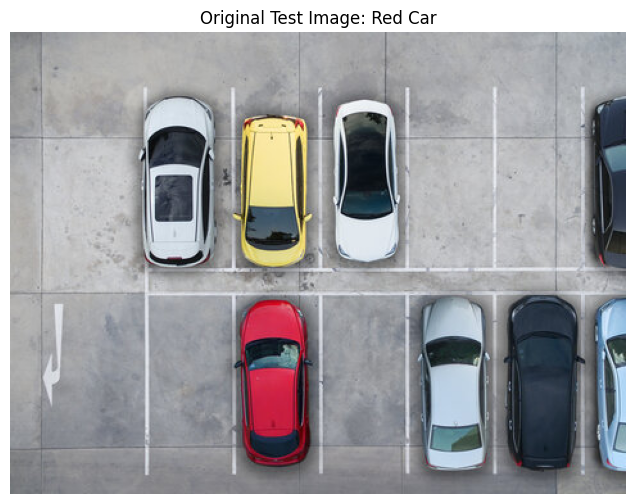


🔹 Running inference with refactored module...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



📝 Raw Model Output:
   the red car(361,571),(491,935)

🔹 Parsing output...

📊 Parsed Bbox Data:
   {'object': 'the red car', 'bbox': [361, 571, 491, 935]}

🎨 Visualizing bounding box...
Drew bbox in pixels for 'the red car': [173, 205, 235, 336]


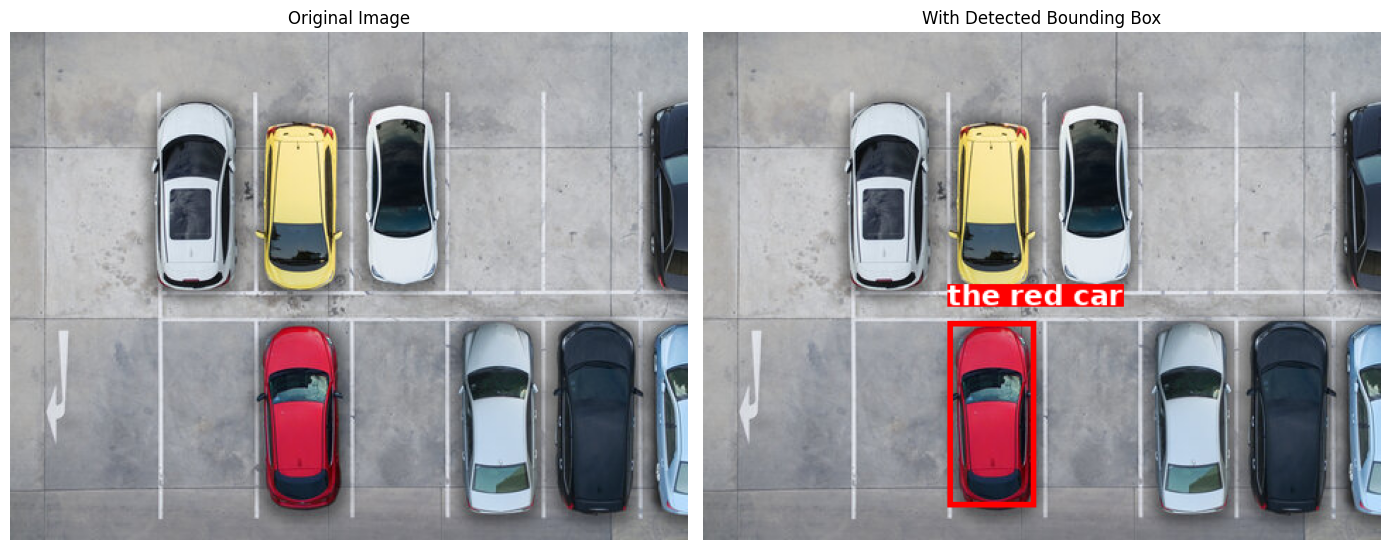


💾 Saved to: /home/zhuoyuan/projects/vlm_Qwen2VL_object_detection/artifacts/verification/red_car_detection.jpg


In [2]:
print("\n" + "=" * 70)
print("TEST 1: RED CAR DETECTION")
print("=" * 70)

# Download test image
test_image_url = "https://t4.ftcdn.net/jpg/01/57/82/05/360_F_157820583_agejYX5XeczPZuWRSCDF2YYeCGwJqUdG.jpg"
response = requests.get(test_image_url)
test_image = Image.open(BytesIO(response.content))

# Display original image
plt.figure(figsize=(8, 6))
plt.imshow(test_image)
plt.title("Original Test Image: Red Car")
plt.axis('off')
plt.show()

# Run inference using refactored module
print("\n🔹 Running inference with refactored module...")
output = run_qwen2vl_inference(
    test_image,
    "Detect the bounding box of the red car."
)

print(f"\n📝 Raw Model Output:")
print(f"   {output}")

# Parse the output
print(f"\n🔹 Parsing output...")
parsed_bbox = parse_qwen_bbox_output(output)

print(f"\n📊 Parsed Bbox Data:")
print(f"   {parsed_bbox}")

# Visualize
if parsed_bbox:
    print(f"\n🎨 Visualizing bounding box...")
    img_with_bbox = visualize_bbox_on_image(test_image, parsed_bbox, normalize_coords=True)

    # Display
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].imshow(test_image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(img_with_bbox)
    axes[1].set_title("With Detected Bounding Box")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Optionally save
    output_dir = project_root / "artifacts" / "verification"
    output_dir.mkdir(parents=True, exist_ok=True)
    img_with_bbox.save(output_dir / "red_car_detection.jpg")
    print(f"\n💾 Saved to: {output_dir / 'red_car_detection.jpg'}")
else:
    print("\n❌ Failed to parse bounding box")

## 3. Test Case 2: Nutrition Table Detection (Real Use Case)

Test on the actual nutrition table dataset.


TEST 2: NUTRITION TABLE DETECTION (Single Bbox)

📦 Loading dataset...

📋 Example Info:
   Dataset index: 0
   Image size: (2592, 1944)
   Ground truth category: nutrition-table


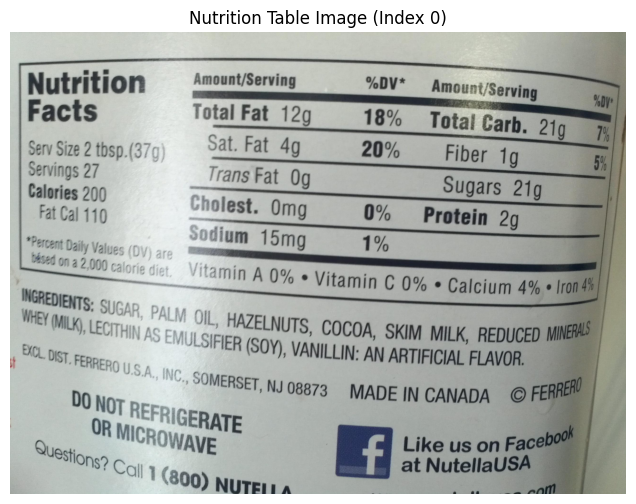


🔹 Running inference...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]


📝 Raw Model Output:
   The nutrition table(10,45),(989,585) is located in the top left corner of the image, spanning from the top left to the bottom right.

📊 Parsed Bbox Data:
   {'object': 'The nutrition table', 'bbox': [10, 45, 989, 585]}
Drew bbox in pixels for 'The nutrition table': [25, 87, 2563, 1137]


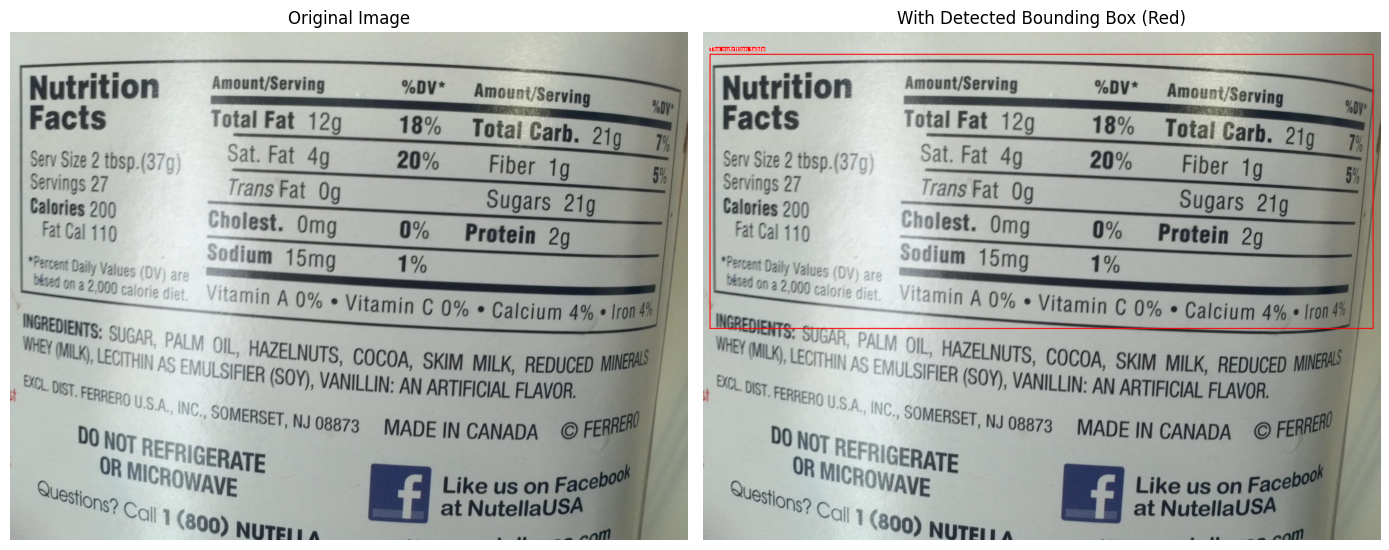


💾 Saved to: /home/zhuoyuan/projects/vlm_Qwen2VL_object_detection/artifacts/verification/nutrition_table_single_0.jpg


In [3]:
print("\n" + "=" * 70)
print("TEST 2: NUTRITION TABLE DETECTION (Single Bbox)")
print("=" * 70)

# Load dataset
from datasets import load_dataset

print("\n📦 Loading dataset...")
dataset = load_dataset("openfoodfacts/nutrition-table-detection", split="train", streaming=False)

# Get first example
example_idx = 0
example = dataset[example_idx]
nutrition_image = example['image']
ground_truth_bbox = example['objects']['bbox'][0]
ground_truth_category = example['objects']['category_name'][0]

print(f"\n📋 Example Info:")
print(f"   Dataset index: {example_idx}")
print(f"   Image size: {nutrition_image.size}")
print(f"   Ground truth category: {ground_truth_category}")

# Display original image
plt.figure(figsize=(8, 6))
plt.imshow(nutrition_image)
plt.title(f"Nutrition Table Image (Index {example_idx})")
plt.axis('off')
plt.show()

# Run inference
print(f"\n🔹 Running inference...")
output = run_qwen2vl_inference(
    nutrition_image,
    "Detect the bounding box of the nutrition table."
)

print(f"\n📝 Raw Model Output:")
print(f"   {output}")

# Parse output
parsed_bbox = parse_qwen_bbox_output(output)
print(f"\n📊 Parsed Bbox Data:")
print(f"   {parsed_bbox}")

# Visualize
if parsed_bbox:
    img_with_bbox = visualize_bbox_on_image(nutrition_image, parsed_bbox, normalize_coords=True)

    # Display
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].imshow(nutrition_image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(img_with_bbox)
    axes[1].set_title("With Detected Bounding Box (Red)")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Save
    img_with_bbox.save(output_dir / f"nutrition_table_single_{example_idx}.jpg")
    print(f"\n💾 Saved to: {output_dir / f'nutrition_table_single_{example_idx}.jpg'}")
else:
    print("\n❌ Failed to parse bounding box")

## 4. Test Case 3: Multiple Bounding Boxes

Test on examples with 2 bounding boxes.


TEST 3: NUTRITION TABLE WITH 2 BOUNDING BOXES

🔍 Finding examples with 2 bounding boxes...

📋 Example Info:
   Dataset index: 42
   Image size: (1193, 452)
   Number of bboxes: 2
   Categories: ['nutrition-table', 'nutrition-table']


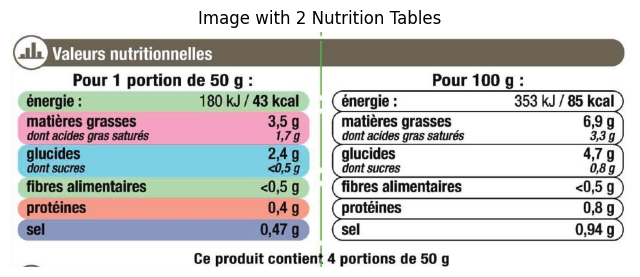


🔹 Running inference...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]


📝 Raw Model Output:
   The nutrition table is located in the middle of the image, spanning from the top to the bottom. The table is divided into two columns, with the left column labeled "Pour 1 portion de 50 g" and the right column labeled "Pour 100 g." The table is structured with rows for different nutrients and their corresponding values.

📊 Parsed Bbox Data:
   None

❌ Failed to parse bounding boxes


In [4]:
print("\n" + "=" * 70)
print("TEST 3: NUTRITION TABLE WITH 2 BOUNDING BOXES")
print("=" * 70)

# Find example with 2 bboxes
print("\n🔍 Finding examples with 2 bounding boxes...")
examples_with_2_bboxes = []
for idx, example in enumerate(dataset):
    if len(example['objects']['bbox']) == 2:
        examples_with_2_bboxes.append(idx)
        if len(examples_with_2_bboxes) >= 1:  # Just get 1 example
            break

if examples_with_2_bboxes:
    example_idx = examples_with_2_bboxes[0]
    example = dataset[example_idx]
    image = example['image']
    bboxes = example['objects']['bbox']
    categories = example['objects']['category_name']

    print(f"\n📋 Example Info:")
    print(f"   Dataset index: {example_idx}")
    print(f"   Image size: {image.size}")
    print(f"   Number of bboxes: {len(bboxes)}")
    print(f"   Categories: {categories}")

    # Display original
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f"Image with {len(bboxes)} Nutrition Tables")
    plt.axis('off')
    plt.show()

    # Run inference
    print(f"\n🔹 Running inference...")
    output = run_qwen2vl_inference(
        image,
        "Detect the bounding box of the nutrition table."
    )

    print(f"\n📝 Raw Model Output:")
    print(f"   {output}")

    # Parse
    parsed_bboxes = parse_qwen_bbox_output(output)
    print(f"\n📊 Parsed Bbox Data:")
    print(f"   {parsed_bboxes}")

    # Visualize
    if parsed_bboxes:
        img_with_bboxes = visualize_bbox_on_image(image, parsed_bboxes, normalize_coords=True)

        # Display
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        axes[0].imshow(image)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img_with_bboxes)
        num_detected = len(parsed_bboxes) if isinstance(parsed_bboxes, list) else 1
        axes[1].set_title(f"Detected {num_detected} Bounding Box(es)")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        # Save
        img_with_bboxes.save(output_dir / f"nutrition_table_double_{example_idx}.jpg")
        print(f"\n💾 Saved to: {output_dir / f'nutrition_table_double_{example_idx}.jpg'}")
    else:
        print("\n❌ Failed to parse bounding boxes")
else:
    print("\n⚠️ No examples with 2 bounding boxes found in dataset")

## 5. Test Parsing with Different Formats

Test the parsing function with various input formats.

In [5]:
print("\n" + "=" * 70)
print("TEST 4: PARSING DIFFERENT OUTPUT FORMATS")
print("=" * 70)

test_cases = [
    {
        "name": "With special tokens",
        "input": "<|object_ref_start|>the red car<|object_ref_end|><|box_start|>(450,380),(650,520)<|box_end|>",
        "expected": "Should parse object and bbox"
    },
    {
        "name": "Without special tokens",
        "input": "the red car(358,571),(492,943)",
        "expected": "Should parse object and bbox"
    },
    {
        "name": "With extra text",
        "input": "The nutrition table(13,60),(984,989) is located in the image",
        "expected": "Should parse despite extra text"
    },
    {
        "name": "Multiple detections",
        "input": "table 1(10,20),(100,200) and table 2(500,600),(900,900)",
        "expected": "Should return list of dicts"
    }
]

for i, test in enumerate(test_cases, 1):
    print(f"\n🔹 Test {i}: {test['name']}")
    print(f"   Input: {test['input'][:60]}...")
    print(f"   Expected: {test['expected']}")

    result = parse_qwen_bbox_output(test['input'])
    print(f"   Result: {result}")

    if result:
        print(f"   ✅ Successfully parsed")
    else:
        print(f"   ❌ Failed to parse")


TEST 4: PARSING DIFFERENT OUTPUT FORMATS

🔹 Test 1: With special tokens
   Input: <|object_ref_start|>the red car<|object_ref_end|><|box_start...
   Expected: Should parse object and bbox
   Result: {'object': 'the red car', 'bbox': [450, 380, 650, 520]}
   ✅ Successfully parsed

🔹 Test 2: Without special tokens
   Input: the red car(358,571),(492,943)...
   Expected: Should parse object and bbox
   Result: {'object': 'the red car', 'bbox': [358, 571, 492, 943]}
   ✅ Successfully parsed

🔹 Test 3: With extra text
   Input: The nutrition table(13,60),(984,989) is located in the image...
   Expected: Should parse despite extra text
   Result: {'object': 'The nutrition table', 'bbox': [13, 60, 984, 989]}
   ✅ Successfully parsed

🔹 Test 4: Multiple detections
   Input: table 1(10,20),(100,200) and table 2(500,600),(900,900)...
   Expected: Should return list of dicts
   Result: [{'object': 'table 1', 'bbox': [10, 20, 100, 200]}, {'object': 'and table 2', 'bbox': [500, 600, 900, 900]}]
  

## 6. Summary

Visual inspection checklist:

**Test 1 - Red Car**:
- [ ] Model detected the car
- [ ] Bounding box looks reasonable
- [ ] Text output parsed correctly
- [ ] Visualization shows bbox overlay

**Test 2 - Single Nutrition Table**:
- [ ] Model detected the nutrition table
- [ ] Bounding box covers the table
- [ ] Coordinates converted correctly (Qwen [0,1000] → pixels)

**Test 3 - Multiple Bounding Boxes**:
- [ ] Model detected multiple tables (if present)
- [ ] All bboxes visualized correctly
- [ ] Parsing handles list of dicts

**Test 4 - Parsing Formats**:
- [ ] Parses with special tokens
- [ ] Parses without special tokens
- [ ] Handles extra text
- [ ] Handles multiple detections

**Overall Verification**:
- [ ] All refactored modules work as expected
- [ ] Outputs are reasonable and consistent
- [ ] Ready to use `src/` modules in production

## 7. Output Location

All visualization outputs saved to:
```
artifacts/verification/
├── red_car_detection.jpg
├── nutrition_table_single_0.jpg
└── nutrition_table_double_X.jpg
```

In [6]:
print("\n" + "=" * 70)
print("✅ VERIFICATION COMPLETE")
print("=" * 70)
print(f"\n📁 Outputs saved to: {output_dir}")
print("\n👀 Please visually inspect the outputs above.")
print("\nIf everything looks correct, the refactored modules are working! 🎉")


✅ VERIFICATION COMPLETE

📁 Outputs saved to: /home/zhuoyuan/projects/vlm_Qwen2VL_object_detection/artifacts/verification

👀 Please visually inspect the outputs above.

If everything looks correct, the refactored modules are working! 🎉
